### Relationship between Social support and GDP

In [54]:
import pandas as pd

In [63]:
df_orig = pd.read_csv("datasets_143758_336483_world-happiness-report-2019-old.csv")
df = pd.read_csv("datasets_143758_336483_world-happiness-report-2019.csv")
plotdf = pd.read_csv("datasets_143758_336483_world-happiness-report-2019.csv", index_col="Country (region)")
#plotdf

### Scatter matrix graph

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3E88589C8>,
      dtype=object)

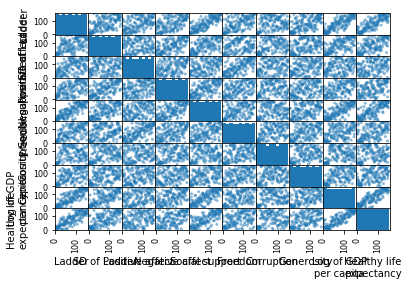

In [77]:
pd.plotting.scatter_matrix(df_orig)

Before removing outliers:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3E86CB388>,
      dtype=object)

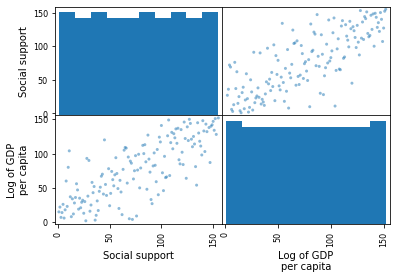

In [64]:
pd.plotting.scatter_matrix(df_orig[["Social support", "Log of GDP\nper capita"]])

After removed some outliers

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3E854A0C8>,
      dtype=object)

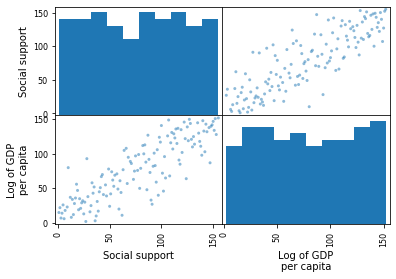

In [53]:
pd.plotting.scatter_matrix(plotdf[["Social support", "Log of GDP\nper capita"]])

Some outliers has been removed from the data to provide more accurate general trend.

### Training a logistic regression model to predict the Social support category 

In [56]:
df = df[["Log of GDP\nper capita", "Social support"]]

In [57]:
# for Social support

# if health charges are less than 3000 we'll call this category 0
df.loc[ df['Social support'] < 30 , 'Social support category'] = 0

# if health charges are between 3000 and 5000 we'll call this category 1
df.loc[ (df['Social support'] >= 30) &  (df['Social support'] < 60), 'Social support category'] = 1

# if health charges are between 5000 and 10000 we'll call this category 2
df.loc[ (df['Social support'] >= 60) &  (df['Social support'] < 90), 'Social support category'] = 2

df.loc[ (df['Social support'] >= 90) &  (df['Social support'] < 120), 'Social support category'] = 3

# if health charges are greater than 10000 we'll call this category 3 
df.loc[ df['Social support'] >= 120, 'Social support category'] = 4
newdf = df
newdf

Log of GDP\nper capita  Social support  Social support category
0                        22               2                      0.0
1                        14               4                      0.0
2                         7               3                      0.0
3                        15               1                      0.0
4                        12              15                      0.0
..                      ...             ...                      ...
133                     132             144                      4.0
134                     125             131                      4.0
135                     134             151                      4.0
136                     152             155                      4.0
137                     140             148                      4.0

[138 rows x 3 columns]

In [58]:
X = newdf[["Log of GDP\nper capita"]]
y = newdf[['Social support category']]
display(X.head())
display(y.head())

Log of GDP\nper capita
0                      22
1                      14
2                       7
3                      15
4                      12

Social support category
0                      0.0
1                      0.0
2                      0.0
3                      0.0
4                      0.0

In [66]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y = y.apply(le.fit_transform)


In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [118]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

# model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
model = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=10000)
model.fit(X_train, y_train.values.ravel())

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [119]:
from sklearn.metrics import confusion_matrix

predictions = model.predict( X_test )

print(confusion_matrix(y_test, predictions))

[[2 0 0 0 1]
 [0 0 0 0 3]
 [0 0 0 0 1]
 [0 0 0 0 3]
 [0 0 0 0 4]]


In [111]:
# logisticRegression r2
from sklearn.metrics import r2_score
print(r2_score(y_test, predictions))

0.6276595744680851


In [120]:
# MLP Classifier r2
from sklearn.metrics import r2_score
print(r2_score(y_test, predictions))

-0.48305084745762716
